In [1]:
# Importing required header files

import numpy as np
import math as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data collection and Description

df = pd.read_csv("medicalpremium.csv")
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [3]:
# Checking for Null values

df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [4]:
# Checking data types of all attributes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


Text(0.5, 1.0, 'Distribution of Age')

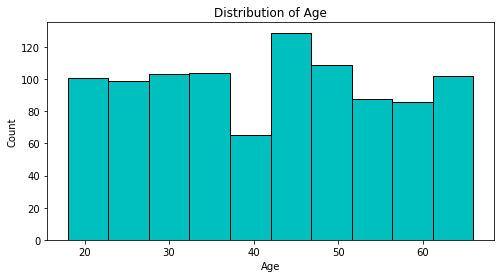

In [5]:
# Distribution of column Age

plt.figure(figsize=(8, 4))
plt.hist(df.Age, color='c', edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Diabetes')

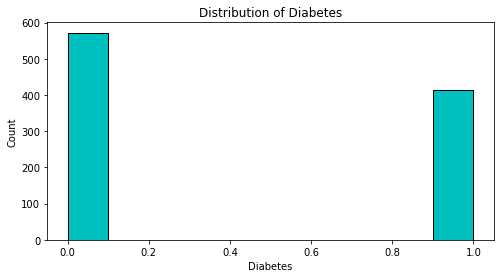

In [6]:
# Distribution of column Diabetes

plt.figure(figsize=(8, 4))
plt.hist(df.Diabetes, color='c', edgecolor='k')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Distribution of Diabetes')

Text(0.5, 1.0, 'Distribution of BloodPressureProblems')

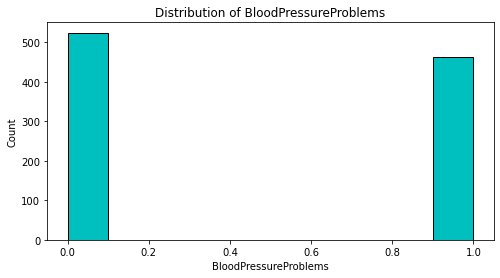

In [7]:
# Distribution of column BloodPressureProblems

plt.figure(figsize=(8, 4))
plt.hist(df.BloodPressureProblems, color='c', edgecolor='k')
plt.xlabel('BloodPressureProblems')
plt.ylabel('Count')
plt.title('Distribution of BloodPressureProblems')

Text(0.5, 1.0, 'Distribution of AnyTransplants')

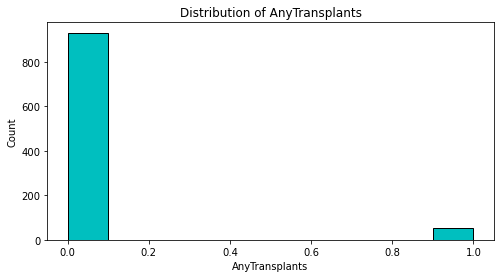

In [8]:
# Distribution of column AnyTransplants

plt.figure(figsize=(8, 4))
plt.hist(df.AnyTransplants, color='c', edgecolor='k')
plt.xlabel('AnyTransplants')
plt.ylabel('Count')
plt.title('Distribution of AnyTransplants')

Text(0.5, 1.0, 'Distribution of AnyChronicDiseases')

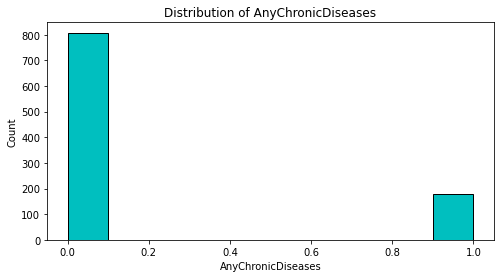

In [9]:
# Distribution of column AnyChronicDiseases

plt.figure(figsize=(8, 4))
plt.hist(df.AnyChronicDiseases, color='c', edgecolor='k')
plt.xlabel('AnyChronicDiseases')
plt.ylabel('Count')
plt.title('Distribution of AnyChronicDiseases')

Text(0.5, 1.0, 'Distribution of Height')

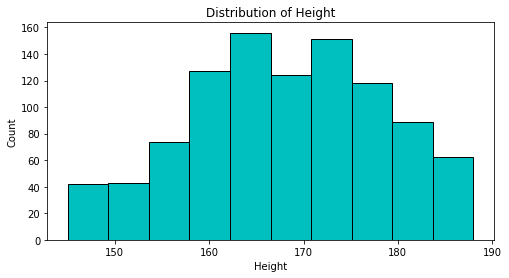

In [10]:
# Distribution of column Height

plt.figure(figsize=(8, 4))
plt.hist(df.Height, color='c', edgecolor='k')
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Distribution of Height')

Text(0.5, 1.0, 'Distribution of Weight')

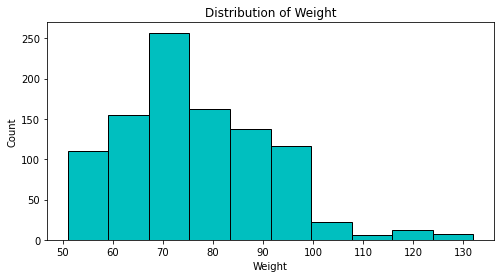

In [11]:
# Distribution of column Weight

plt.figure(figsize=(8, 4))
plt.hist(df.Weight, color='c', edgecolor='k')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Distribution of Weight')

Text(0.5, 1.0, 'Distribution of KnownAllergies')

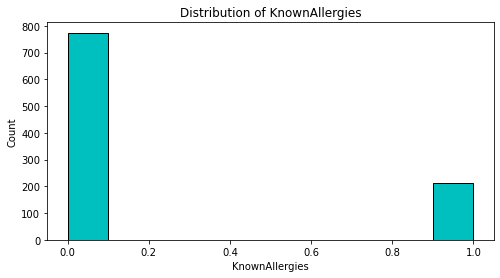

In [12]:
# Distribution of column KnownAllergies

plt.figure(figsize=(8, 4))
plt.hist(df.KnownAllergies, color='c', edgecolor='k')
plt.xlabel('KnownAllergies')
plt.ylabel('Count')
plt.title('Distribution of KnownAllergies')

Text(0.5, 1.0, 'Distribution of HistoryOfCancerInFamily')

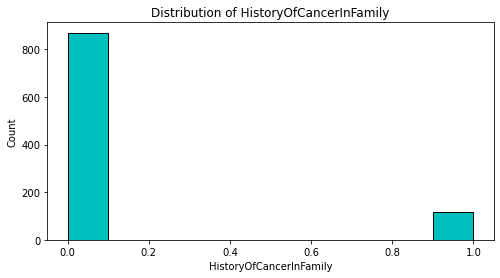

In [13]:
# Distribution of column HistoryOfCancerInFamily

plt.figure(figsize=(8, 4))
plt.hist(df.HistoryOfCancerInFamily, color='c', edgecolor='k')
plt.xlabel('HistoryOfCancerInFamily')
plt.ylabel('Count')
plt.title('Distribution of HistoryOfCancerInFamily')

Text(0.5, 1.0, 'Distribution of NumberOfMajorSurgeries')

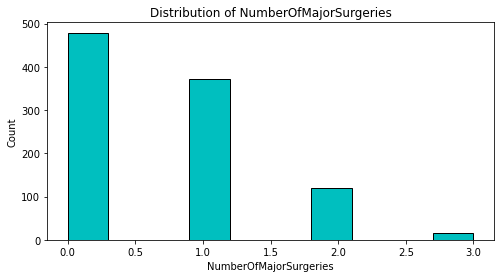

In [14]:
# Distribution of column NumberOfMajorSurgeries

plt.figure(figsize=(8, 4))
plt.hist(df.NumberOfMajorSurgeries, color='c', edgecolor='k')
plt.xlabel('NumberOfMajorSurgeries')
plt.ylabel('Count')
plt.title('Distribution of NumberOfMajorSurgeries')

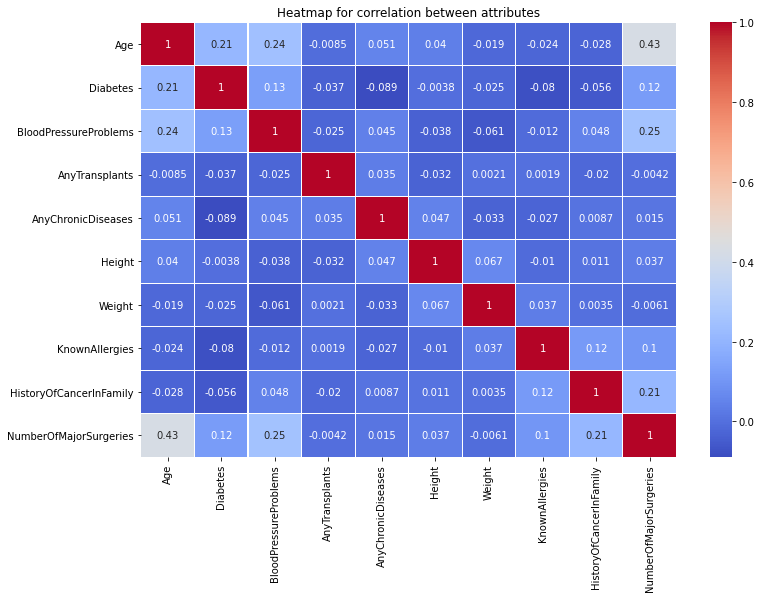

In [15]:
# Correlation Heatmap of the data

plt.figure(figsize=(12, 8))
Xcorr = df.drop('PremiumPrice', axis=1)
sns.heatmap(Xcorr.corr(), annot=True, cmap='coolwarm', linewidths=0.1)
plt.title("Heatmap for correlation between attributes")
plt.show()

In [16]:
# Segregating dependent and independent features

X = df.drop('PremiumPrice', axis=1)
Y = df.PremiumPrice

In [17]:
# Normalization of the data

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
# Implementing ML models to predict outcome

models = {
    RandomForestRegressor(): 'Random Forest',
    GradientBoostingRegressor(): 'Boosting Regressor',
    LinearRegression(): 'Linear Regression',
    Lasso(): 'Lasso Regression',
    Ridge(): 'Ridge Regression'
}

In [19]:
# Training the models and evaluating the accuray, rmse, R2 values for each model

accuracy = {
    'Random Forest': 0,
    'Boosting Regressor': 0,
    'Linear Regression': 0,
    'Lasso Regression': 0,
    'Ridge Regression': 0
}

rmse = {
    'Random Forest': 0,
    'Boosting Regressor': 0,
    'Linear Regression': 0,
    'Lasso Regression': 0,
    'Ridge Regression': 0
}

adjR2 = {
    'Random Forest': 0,
    'Boosting Regressor': 0,
    'Linear Regression': 0,
    'Lasso Regression': 0,
    'Ridge Regression': 0
}

for i in range(10):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, random_state=2)
    for key, val in models.items():
        key.fit(Xtrain, Ytrain)
        pred = key.predict(Xtest)
        accuracy[val] += key.score(Xtest, Ytest) / 10
        rmse[val] += mp.sqrt(mean_squared_error(Ytest, pred)) / 10
        adjR2[val] += (1 - ( 1 - key.score(Xtest, Ytest)) * (len(Ytest) - 1) / (len(Ytest) - Xtest.shape[1] - 1 )) / 10

In [20]:
# Printing average accuracy for each model

for key, val in accuracy.items():
    print(f"Accuracy Score for {key} is :", val * 100, "%")
    print(f"RMSE error for {key} is :", rmse[key])
    print(f"adjR^2 value for {key} is :", adjR2[key])
    print("\n")

Accuracy Score for Random Forest is : 89.34200169815327 %
RMSE error for Random Forest is : 1920.2553821560032
adjR^2 value for Random Forest is : 0.8813086552748886


Accuracy Score for Boosting Regressor is : 86.93164204265975 %
RMSE error for Boosting Regressor is : 2126.6602549492613
adjR^2 value for Boosting Regressor is : 0.8544660136568925


Accuracy Score for Linear Regression is : 71.36026902536426 %
RMSE error for Linear Regression is : 3148.270738151113
adjR^2 value for Linear Regression is : 0.6810575414188291


Accuracy Score for Lasso Regression is : 71.35760642773202 %
RMSE error for Lasso Regression is : 3148.417080017944
adjR^2 value for Lasso Regression is : 0.6810278897633792


Accuracy Score for Ridge Regression is : 71.35319203462943 %
RMSE error for Ridge Regression is : 3148.6596891969125
adjR^2 value for Ridge Regression is : 0.6809787294765554




Text(0.5, 1.0, 'Visualizing Important Features')

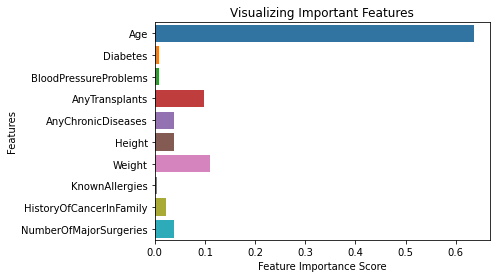

In [21]:
# Visualizing importance of each feature

rf = RandomForestRegressor()
rf.fit(Xtrain, Ytrain)
featureImp = rf.feature_importances_
x = df.drop(['PremiumPrice'], axis=1)
sns.barplot(x=featureImp, y=x.columns)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')

In [23]:
# Removing the least contributing attributes

Xfs = df.drop(['Diabetes', 'BloodPressureProblems', 'KnownAllergies', 'PremiumPrice'], axis=1)

In [24]:
# Using BMI instead of Height & Weight

Xfs['BMI'] = 10000* Xfs['Weight'] / (Xfs['Height'] * Xfs['Height'])
Xfs = Xfs.drop(['Weight', 'Height'], axis=1)
Yfs = df.PremiumPrice
Xfs.describe()

,Age,AnyTransplants,AnyChronicDiseases,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.055781,0.180527,0.117647,0.667343,27.460709
std,13.963371,0.229615,0.384821,0.322353,0.749205,5.878671
min,18.000000,0.000000,0.000000,0.000000,0.000000,15.156281
25%,30.000000,0.000000,0.000000,0.000000,0.000000,23.393392
50%,42.000000,0.000000,0.000000,0.000000,1.000000,27.156602
75%,53.000000,0.000000,0.000000,0.000000,1.000000,30.759870
max,66.000000,1.000000,1.000000,1.000000,3.000000,50.000000


In [25]:
# Training the models again after removing least contributing attributes

accuracyFS = {
    'Random Forest': 0,
    'Boosting Regressor': 0,
    'Linear Regression': 0,
    'Lasso Regression': 0,
    'Ridge Regression': 0
}

rmseFS = {
    'Random Forest': 0,
    'Boosting Regressor': 0,
    'Linear Regression': 0,
    'Lasso Regression': 0,
    'Ridge Regression': 0
}

adjR2FS = {
    'Random Forest': 0,
    'Boosting Regressor': 0,
    'Linear Regression': 0,
    'Lasso Regression': 0,
    'Ridge Regression': 0
}

for i in range(10):
    XtrainFS, XtestFS, YtrainFS, YtestFS = train_test_split(Xfs, Yfs, test_size=0.1, random_state=2)
    for key, val in models.items():
        key.fit(XtrainFS, YtrainFS)
        predFS = key.predict(XtestFS)
        accuracyFS[val] += key.score(XtestFS, YtestFS) / 10
        rmseFS[val] += mp.sqrt(mean_squared_error(YtestFS, predFS)) / 10
        adjR2FS[val] += (1 - ( 1 - key.score(XtestFS, YtestFS)) * (len(YtestFS) - 1) / (len(YtestFS) - XtestFS.shape[1] - 1 )) / 10

In [26]:
# Printing average accuracy for each model

for key, val in accuracyFS.items():
    print(f"Accuracy Score for {key} is :", val * 100, "%")
    print(f"RMSE error for {key} is :", rmseFS[key])
    print(f"adjR^2 value for {key} is :", adjR2FS[key])
    print("\n")

Accuracy Score for Random Forest is : 88.73800894183825 %
RMSE error for Random Forest is : 1973.9958841746222
adjR^2 value for Random Forest is : 0.8800353126413205


Accuracy Score for Boosting Regressor is : 87.09295384237954 %
RMSE error for Boosting Regressor is : 2113.492967751844
adjR^2 value for Boosting Regressor is : 0.8625118996253475


Accuracy Score for Linear Regression is : 72.39005313631938 %
RMSE error for Linear Regression is : 3091.152214737677
adjR^2 value for Linear Regression is : 0.7058940442781846


Accuracy Score for Lasso Regression is : 72.37530688516878 %
RMSE error for Lasso Regression is : 3091.9775843478915
adjR^2 value for Lasso Regression is : 0.705736964646363


Accuracy Score for Ridge Regression is : 72.35185115138076 %
RMSE error for Ridge Regression is : 3093.289982904244
adjR^2 value for Ridge Regression is : 0.7054871100907948




### temp CONCLUSION


On training the models on our original dataset of 10 attributes, the models gave an accuracy of 86%, 85%, 65%, 65% and 65% respectively.

after analysing the  important attributes that have highest impact on our Insurance Premium and eliminating the remaining 6 not so important attributes, we would not expect our accuracy to go down by that much. 

The results were similar to our expectations, the accuracy of the models on the new lean dataset was 83%, 77%, 64%, 64% and 64% respectively.

There was an approximate 10% decrease in the accuracy of the models after eliminating the least contributing 6 attributes and this made the execution a lot simpler and faster.